In [1018]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import numpy as np
import json
import os
import datetime
import pytz
import matplotlib.pyplot as plt
from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame
import igraph as ig
import sqlite3
import hatching as ht
from scipy import stats
import os
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl

%matplotlib inline

In [6]:
def getAllNetworks(folder):
    graph_files = os.listdir("{}/".format(folder))
    graph_files = [g for g in graph_files if g.endswith('.graphml')]
    graph_files.sort()
    
    print(graph_files)
    g_list = []
    for f in graph_files:
        g_list.append((f, ig.Graph.Read_GraphML("{}/{}".format(folder,f))))
    return g_list

In [456]:
def network_statistics(i, G):

    # Number of Nodes
    nodes = len(G.degree())

    # Number of edges
    edges = len(G.get_edgelist())

    # Density
    density = G.density()

    # Average Degree
    average_degree = ig.mean(G.degree())
    
    # Average weighted Degree
    average_degreeF = ig.mean(G.strength(weights="frequency"))

    # Max Degree
    max_deg = max(G.degree())
    
    # Max weighted Degree
    max_degF = max(G.strength(weights="frequency"))
    
    # Min Degree
    min_deg = min(G.degree())
    
    # Min weighted Degree
    min_degF = min(G.strength(weights="frequency"))
    
    # Average Clustering Coefficient
    cc = G.transitivity_undirected()
    
    # Weighted average Clustering Coefficient
    ccF = G.transitivity_avglocal_undirected(weights="frequency")

    # Weighted average Clustering Coefficient
    ccFinv = G.transitivity_avglocal_undirected(weights="finv")

    # Components
    vc = G.components()
    components = len(Series(vc.membership).unique())
    
    # Average Shortest Path length
    average_shortest_path = G.average_path_length()

    # Diameter
    diameter = G.diameter()

    return {'nodes': nodes,
            'edges': edges,
            'density': density,
            'averageDeg': average_degree,
            'averageDegF': average_degreeF,
            'maxDeg': max_deg,
            'maxDegF': max_degF,
            'minDeg': min_deg,
            'minDegF': min_degF,
            'gcc': cc,
            'gccF': ccF,
            'gccFinv': ccFinv,
            'components': components,
            'av_shortest_path':average_shortest_path,
            'diameter': diameter,
            'date': i}

In [7]:
graphs = getAllNetworks("networks")

['0813_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-13_08:00:00+00:00.graphml', '0814_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-14_08:00:00+00:00.graphml', '0816_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-16_08:00:00+00:00.graphml', '0817_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-17_08:00:00+00:00.graphml', '0820_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-20_08:00:00+00:00.graphml', '0822_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-22_08:00:00+00:00.graphml', '0824_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-24_08:00:00+00:00.graphml', '0825_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-25_08:00:00+00:00.graphml', '0902_10h_95conf_212dist_3ilen_2gap_600minutes_2016-09-02_08:00:00+00:00.graphml']


In [458]:
alles = []
for i,g in graphs:
    date = i.split("_")[0]
    print(date)
    print(g.summary())
    n = network_statistics(date, g)
    alles.append(n)

0813
IGRAPH U--- 1243 493813 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0814
IGRAPH U--- 1193 406023 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0816
IGRAPH U--- 1167 409107 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0817
IGRAPH U--- 1095 381548 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0820
IGRAPH U--- 922 291179 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0822
IGRAPH U--- 978 256066 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0824
IGRAPH U--- 922 259421 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0825
IGRAPH U--- 783 194187 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)
0902
IGRAPH U--- 379 43922 -- 
+ attr: id (v), finv (e), frequency (e), totalduration (e)


In [459]:
df = DataFrame(alles)

In [460]:
df.to_csv("Networks_Stat3.csv")

In [1189]:
df_tu = pd.read_csv("Networks_Stat3.csv")

In [1191]:
df_tu.iloc[[4,5,6]]

,Unnamed: 0,av_shortest_path,averageDeg,averageDegF,components,date,density,diameter,edges,gcc,gccF,gccFinv,maxDeg,maxDegF,minDeg,minDegF,nodes
4,4,1.315214,631.624729,5680.173536,1,820,0.685803,3,291179,0.791449,NaN,NaN,850,13555.0,1,1.0,922
5,5,1.464426,523.652352,3977.944785,1,822,0.535980,3,256066,0.722301,0.785232,0.692649,822,10468.0,3,8.0,978
6,6,1.389012,562.735358,4205.993492,1,824,0.611005,3,259421,0.746909,0.806564,0.716488,842,10864.0,51,64.0,922


In [461]:
df['av_shortest_path'] = df['av_shortest_path'].apply(lambda x: round(x,2))
df['averageDeg'] = df['averageDeg'].apply(lambda x: round(x,2))
df['averageDegF'] = df['averageDegF'].apply(lambda x: round(x,2))
df['density'] = df['density'].apply(lambda x: round(x,2))
df['gcc'] = df['gcc'].apply(lambda x: round(x,2))
df['gccF'] = df['gccF'].apply(lambda x: round(x,2))
df['gccFinv'] = df['gccFinv'].apply(lambda x: round(x,2))

In [462]:
df.iloc[[4,5,6]]

,av_shortest_path,averageDeg,averageDegF,components,date,density,diameter,edges,gcc,gccF,gccFinv,maxDeg,maxDegF,minDeg,minDegF,nodes
4,1.32,631.62,5680.17,1,0820,0.69,3,291179,0.79,NaN,NaN,850,13555.0,1,1.0,922
5,1.46,523.65,3977.94,1,0822,0.54,3,256066,0.72,0.79,0.69,822,10468.0,3,8.0,978
6,1.39,562.74,4205.99,1,0824,0.61,3,259421,0.75,0.81,0.72,842,10864.0,51,64.0,922


In [463]:
dffinal = df.iloc[[4,5,6],[0,1,2,5,6,7,8,15]].reindex(columns=["nodes", "edges", "density", "diameter", "av_shortest_path","gcc", "averageDeg", "averageDegF"])

In [465]:
dffinal

,nodes,edges,density,diameter,av_shortest_path,gcc,averageDeg,averageDegF
4,922,291179,0.69,3,1.32,0.79,631.62,5680.17
5,978,256066,0.54,3,1.46,0.72,523.65,3977.94
6,922,259421,0.61,3,1.39,0.75,562.74,4205.99


In [467]:
print(dffinal.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  nodes &   edges &  density &  diameter &  av\_shortest\_path &   gcc &  averageDeg &  averageDegF \\
\midrule
4 &    922 &  291179 &     0.69 &         3 &              1.32 &  0.79 &      631.62 &      5680.17 \\
5 &    978 &  256066 &     0.54 &         3 &              1.46 &  0.72 &      523.65 &      3977.94 \\
6 &    922 &  259421 &     0.61 &         3 &              1.39 &  0.75 &      562.74 &      4205.99 \\
\bottomrule
\end{tabular}



In [747]:
def getNodesAndAges(g, datee, colid, colage):
    date_dt = datetime.datetime.strptime(datee, "%Y-%m-%d").replace(tzinfo=pytz.UTC)
    aa = ht.get_all_bees_age(date_dt)
    
    ids = []
    for v in g.vs:
        id = v.attributes().get("id")
        id = int(id)
        ids.append(id)
    
    df = DataFrame(ids, columns=[colid])
    df[colage] = df.id.apply(lambda x: aa.iloc[x].age)
    return df

In [105]:
graphs[4][0]

'0820_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-20_08:00:00+00:00.graphml'

In [748]:
g4 = getNodesAndAges(graphs[4][1], "2016-08-20", "id", "age")

In [749]:
g5 = getNodesAndAges(graphs[5][1], "2016-08-22", "id", "age")

In [750]:
g6 = getNodesAndAges(graphs[6][1], "2016-08-24", "id", "age")

In [751]:
gr = [g4, g5, g6]

## Age in days distribution per snapshot

(11, 2)
(10, 2)
(9, 2)


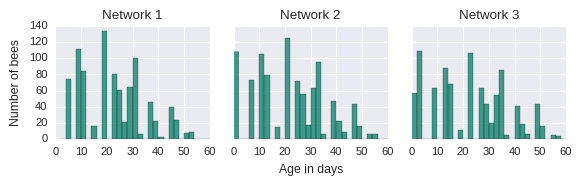

In [470]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,5.91553/3)

for i, ax in enumerate(axn.flat):
    df = gr[i]
    print(df[df.age < 0].shape)
    df = df.query("age > -100 & age < 200")
    
    df = df.age
    ax.hist(df, bins=30, alpha=0.75, range=(0,60), color='#007f66')
    ax.set_title("Network {}".format(i+1))
    
    if (i == 0):
        ax.set_ylabel('Number of bees')
    if (i == 1):
        ax.set_xlabel('Age in days')

#plt.subplots_adjust(top=0.7)

#fig.suptitle("Age Distribution per Community")
fig.tight_layout()
plt.savefig('ages.pdf')

In [1112]:
def plotn3(df, snapshotN):
    sns.set_context("paper")
    sns.set_style("darkgrid", {"axes.facecolor": "#ebebeb"})
    fig, ax = plt.subplots()
    fig.set_size_inches(5.91553,5.91553/3)

    print(df[df.age < 0].shape)
    df = df.query("age > -100 & age < 200")
    df = df.age
    ecolor= 'white'
    lw = 0
    al = 1
    ax.hist(df, bins=60, range=(0,60), color='#007f66', alpha=al, edgecolor=ecolor, linewidth=lw)
    #ax.set_title("Snapshot {}".format(i+1))

    ax.set_ylabel('Number of bees')

    ax.set_xlabel('Age in days')

    fig.tight_layout()
    plt.savefig('n{}_ages.pdf'.format(snapshotN), bbox_inches='tight')

(9, 2)


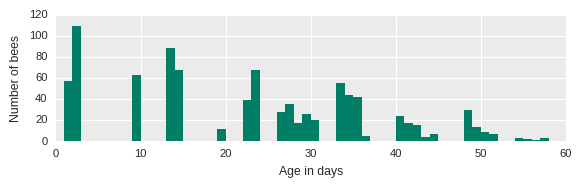

In [1114]:
plotn3(gr[2], '3')

(10, 2)


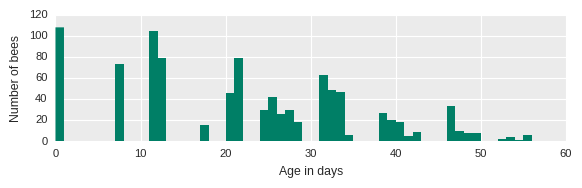

In [1115]:
plotn3(gr[1], '2')

(11, 2)


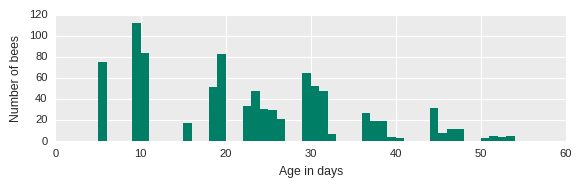

In [1116]:
plotn3(gr[0], '1')

# Degree Distribution

In [8]:
graphs_456 = [("2016-08-20", graphs[4][1]),("2016-08-22", graphs[5][1]),("2016-08-24", graphs[6][1])]

In [17]:
def plotDegStrCC(g):
    sns.set_context("paper")
    fig, axn = plt.subplots(ncols=3)
    fig.set_size_inches(5.91553,5.91553/3)
    
    l = [Series(g.degree())/len(g.degree()),
         Series(g.strength(weights='frequency')),
         Series(g.transitivity_local_undirected())]
    
    lab=['Degree $k$', 'Strength $s$', 'LCC $c$']
    ran=[(0,1),(0,14000),(0.65,1)]
    logg=['linear', 'linear', 'linear']
    
    for i, ax in enumerate(axn.flat):
        ax.hist(l[i], bins=20, color='#007f66', alpha=0.75, range=ran[i])        
        ax.set_xlabel(lab[i])
        ax.set_ylim(0,180)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation='45')
        ax.set_yscale(logg[i])
        if (i == 0):
            ax.set_ylabel('Frequency')
        
        xfmt = ScalarFormatter(useMathText=True)
        xfmt.set_powerlimits((0,0))
        #xfmt.set_useOffset(10)
        ax.xaxis.set_major_formatter(xfmt)

#         for label in ax.xaxis.get_ticklabels()[::2]:
#             label.set_visible(False)

        
    fig.tight_layout()
    plt.savefig('n3-stat-degreeStrLCC.pdf')

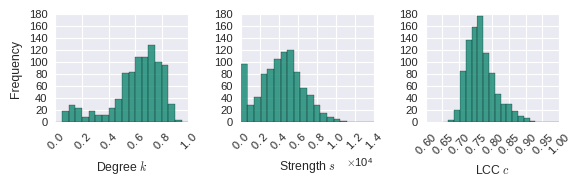

In [18]:
plotDegStrCC(graphs_456[2][1])

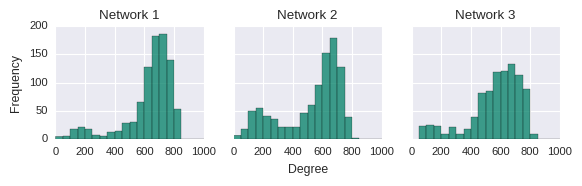

In [492]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,5.91553/3)

#fig.text(0.5, 0.001, 'Degree', ha='center')
#fig.text(0.001, 0.5, 'Frequency', va='center', rotation='vertical')

for i, ax in enumerate(axn.flat):
    g = graphs_456[i][1]
    degrees = g.degree()
    ax.hist(degrees, bins=20, range=(0,1000), color='#007f66', alpha=0.75)
    plt.ylim(0,200)
    ax.set_title("Network {}".format(i+1))

    if (i == 0):
        ax.set_ylabel('Frequency')
    if (i == 1):
        ax.set_xlabel('Degree')

#plt.subplots_adjust(top=0.7)

#fig.suptitle("Age Distribution per Community")
fig.tight_layout()
plt.savefig('stat-degreeDist.pdf')

## Degree and Age

In [189]:
def getDFAge(g,start):
    start_dt = datetime.datetime.strptime(start, "%Y-%m-%d").replace(tzinfo=pytz.UTC)
    aa = ht.get_all_bees_age(start_dt)

    ids = []
    for v in g.vs:
        i = v.attributes().get("id")
        i = int(i)
        ids.append(i)

    df = DataFrame(ids, columns=['id'])
    df["age"] = df.id.apply(lambda x: aa.iloc[x].age)

    # degree
    deg = g.degree()
    df["degree"] = deg
    
    # strength
    strength = g.strength(weights="frequency")
    df["strength"] = strength

    # local cc
    cc = g.transitivity_local_undirected()
    df["cc"] = cc
    
    return df

In [31]:
QUEEN = 1751

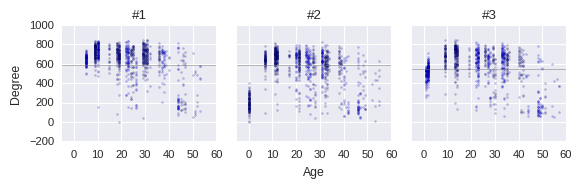

In [232]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,2)


for i, ax in enumerate(axn.flat):
    g = graphs_456[i][1]
    df = getDFAge(g, graphs_456[i][0])
    
    q = df[df.id==QUEEN].degree
    q = q.iloc[0]
    
    df = df[df.age < 200] # queen raus
    df = df[df.age >= 0]
    ax.scatter(x=df.age, y=df.degree, s=2, alpha=0.25)
    ax.set_title("#{}".format(i+1))
    ax.set_xlim((-5,60))
    
    ax.axhline(q, linewidth=0.5, color='0.5', linestyle='solid', alpha=0.75)
    #ax.text(60, 450, 'q', rotation=0)

    if (i == 0):
        ax.set_ylabel('Degree')
    if (i == 1):
        ax.set_xlabel('Age')

fig.tight_layout()
plt.savefig('stat-degreeAge.pdf')

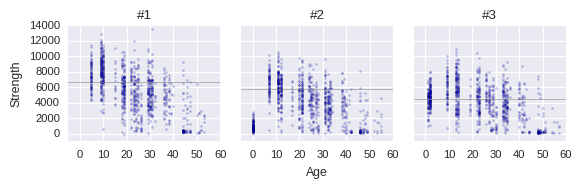

In [240]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,2)

for i, ax in enumerate(axn.flat):
    g = graphs_456[i][1]
    df = getDFAge(g, graphs_456[i][0])
    
    q = df[df.id==QUEEN].strength
    q = q.iloc[0]
    
    df = df[df.age < 200] # queen raus
    df = df[df.age >= 0]
    ax.scatter(x=df.age, y=df.strength, s=2, alpha=0.25)
    ax.set_title("#{}".format(i+1))
    ax.set_xlim((-5,60))
    ax.set_ylim((-1000,14000))
    
    ax.axhline(q, linewidth=0.5, color='0.5', linestyle='solid', alpha=0.75)
    #ax.text(60, 450, 'q', rotation=0)

    if (i == 0):
        ax.set_ylabel('Strength')
    if (i == 1):
        ax.set_xlabel('Age')

fig.tight_layout()
plt.savefig('stat-strengthAge.pdf')

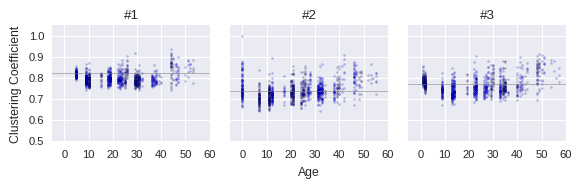

In [245]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,2)

for i, ax in enumerate(axn.flat):
    g = graphs_456[i][1]
    df = getDFAge(g, graphs_456[i][0])
    
    q = df[df.id==QUEEN].cc
    q = q.iloc[0]
    
    df = df[df.age < 200] # queen raus
    df = df[df.age >= 0]
    ax.scatter(x=df.age, y=df.cc, s=2, alpha=0.25)
    ax.set_title("#{}".format(i+1))
    ax.set_xlim((-5,60))
    ax.set_ylim((0.5,1.05))
    
    ax.axhline(q, linewidth=0.5, color='0.5', linestyle='solid', alpha=0.75)
    #ax.text(60, 450, 'q', rotation=0)

    if (i == 0):
        ax.set_ylabel('Clustering Coefficient')
    if (i == 1):
        ax.set_xlabel('Age')

fig.tight_layout()
plt.savefig('stat-ccAge.pdf')

# Strength Distribution

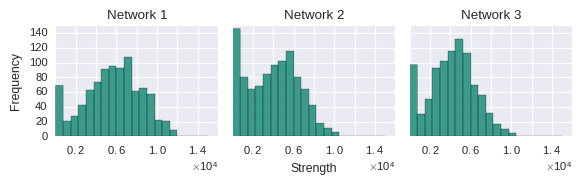

In [493]:
from matplotlib.ticker import ScalarFormatter

sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,5.91553/3)

for i, ax in enumerate(axn.flat):
    g = graphs_456[i][1]
    degrees = g.strength(weights='frequency')
    ax.hist(degrees, bins=20, range=(0,15000), color='#007f66', alpha=0.75)
    plt.ylim(0,150)
    ax.set_title("Network {}".format(i+1))
    
    xfmt = ScalarFormatter(useMathText=True)
    xfmt.set_powerlimits((0,0))
    #xfmt.set_useOffset(10)
    ax.xaxis.set_major_formatter(xfmt)
    
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    
    if (i == 0):
        ax.set_ylabel('Frequency')
    if (i == 1):
        ax.set_xlabel('Strength')

#plt.subplots_adjust(top=0.7)

#fig.suptitle("Age Distribution per Community")
fig.tight_layout()
plt.savefig('stat-strengthDist.pdf')

# Edge weight distribution

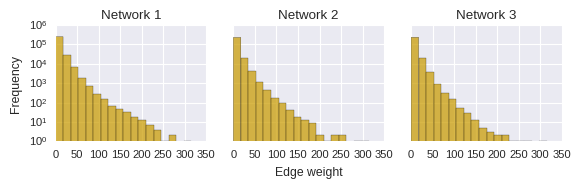

In [807]:
from matplotlib.ticker import ScalarFormatter

sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,2)

for i, ax in enumerate(axn.flat):
    g = graphs_456[i][1]
    edges = g.es["frequency"]
    edges = [int(e) for e in edges]
    ax.hist(edges, bins=20, range=(0,350), color='#cb9f0a', alpha=0.75, )
    ax.set_yscale('log')
    ax.set_title("Network {}".format(i+1))
    
    #xfmt = ScalarFormatter(useMathText=True)
    #xfmt.set_powerlimits((0,0))
    #xfmt.set_useOffset(10)
    #ax.xaxis.set_major_formatter(xfmt)
    
    if (i == 0):
        ax.set_ylabel('Frequency')
    if (i == 1):
        ax.set_xlabel('Edge weight')

#plt.subplots_adjust(top=0.7)

#fig.suptitle("Age Distribution per Community")
fig.tight_layout()
plt.savefig('stat-edgeWeightDist.pdf')

## Frequency VS total duration

In [917]:
from matplotlib.ticker import ScalarFormatter

g3 = graphs_456[2][1]
g2 = graphs_456[1][1]
g1 = graphs_456[0][1]

In [921]:
len(g3.es["frequency"]), len(g2.es["frequency"] ), len(g1.es["frequency"])

(259421, 256066, 291179)

In [920]:
len(g3.es["frequency"] + g2.es["frequency"] + g1.es["frequency"])

806666

In [922]:
edgesF = g1.es["frequency"] + g2.es["frequency"] + g3.es["frequency"]
edgesF = [int(e) for e in edgesF]
edgesD = g1.es["totalduration"] + g2.es["totalduration"] + g3.es["totalduration"]
edgesD = [int(e) for e in edgesD]

In [923]:
edgedata = pd.concat([Series(edgesF, name="f"), Series(edgesD, name='d')], axis=1)

In [924]:
edgedataSD = edgedata.groupby(by='f').std().reset_index()

In [925]:
edgedataVAL = edgedata.groupby(by='f').mean().reset_index()

In [994]:
edgesFn3 = g3.es["frequency"]

In [1421]:
def plotEdgeweights(edges, ss, ylimmax = 10**5):
    edg = Series(edges)
    sns.set_context("paper")
    sns.set_style("darkgrid", {"axes.facecolor": "#ebebeb"})
    fig, ax = plt.subplots()
    fig.set_size_inches(5.91553, 5.91553/3)

    ecolor= 'white'
    lw = 0
    al = 1
    xx = edg.value_counts().index
    yy = np.log(edg.value_counts().values)

    ax.scatter(x=xx, y=yy, color='#007f66', alpha=al, edgecolor=ecolor, linewidth=lw, s=10)
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Link weight')
    #ax.set_xlim(0,1000)
    #ax.set_ylim(1,ylimmax)

    fig.tight_layout()
    #plt.savefig('n{}-edgeWeightDist.pdf'.format(ss), bbox_inches='tight')

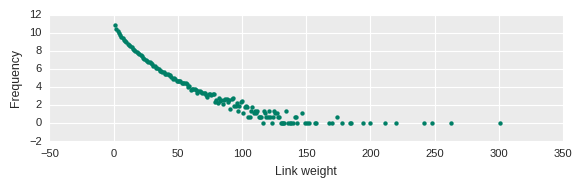

In [1422]:
plotEdgeweights(g3.es["frequency"], '3')

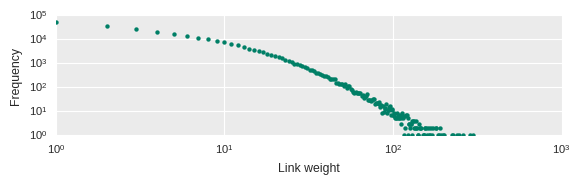

In [1412]:
plotEdgeweights(g2.es["frequency"], '2')

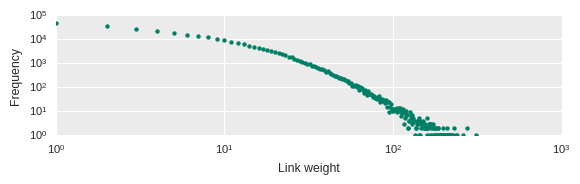

In [1413]:
plotEdgeweights(g1.es["frequency"], '1')

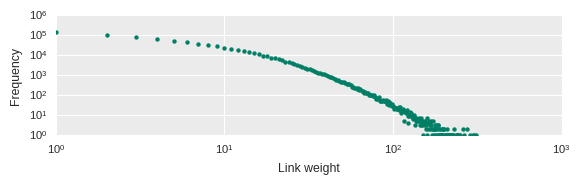

In [1416]:
plotEdgeweights(g1.es["frequency"]+g2.es["frequency"]+g3.es["frequency"], '123', 10**6)

## Fit exponential decay

In [1223]:
edg = Series(edgesFn3)

In [1278]:
import scipy as scipy

In [1395]:
xx = edg.value_counts().index
yy = np.log(edg.value_counts().values)

[[  1.27921165e-02  -1.32076782e-05  -7.53946693e-03]
 [ -1.32076782e-05   1.83682932e-07   4.41840475e-05]
 [ -7.53946693e-03   4.41840475e-05   1.30074246e-02]]


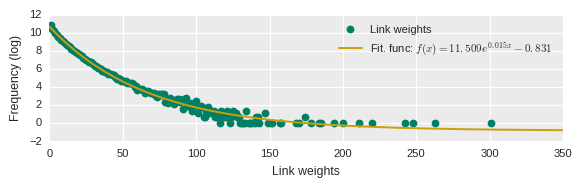

In [1444]:
from scipy.optimize import curve_fit
from networkx.utils import powerlaw_sequence
import numpy as np
# define type of function to search
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

# sample data
x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

def expodecay(x,y):
    # curve fit
    p0 = (1.,1.e-5,1.) # starting search koefs
    opt, pcov = curve_fit(model_func, x, y, p0)
    print(pcov)
    a, k, b = opt
    # test result
    x2 = np.linspace(0, 350, 250)
    y2 = model_func(x2, a, 0.015, b)
    fig, ax = plt.subplots()
    ax.plot(x, y, 'bo', label='Link weights', color='#007f66')
    ax.plot(x2, y2, color='#CB9F0A', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))
    fig.set_size_inches(5.91553, 5.91553/3)
    ax.legend(loc='best')
    ax.set_xlabel("Link weights")
    ax.set_ylabel('Frequency (log)')
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    #ax.set_aspect('equal')
    #plt.show()
    fig.tight_layout()
    plt.savefig('loglog.pdf', bbox_inches='tight')

expodecay(xx,yy)

In [1424]:
def fitPowLaw(x,y):
    # Define function for calculating a power law
    powerlaw = lambda x, amp, index: amp * (x**index)

    ##########
    # Generate data points with noise
    ##########
    num_points = len(x)

    # Note: all positive, non-zero data
    xdata = x #np.linspace(1.1, 10.1, num_points)
    ydata = np.array(y) # powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
    yerr = 0.2 * ydata                     # simulated errors (10%)

    print(yerr)
    ydata = ydata + np.random.randn(num_points) * yerr       # simulated noisy data

    ##########
    # Fitting the data -- Least Squares Method
    ##########

    # Power-law fitting is best done by first converting
    # to a linear equation and then fitting to a straight line.
    #
    #  y = a * x^b
    #  log(y) = log(a) + b*log(x)
    #

    logx = np.log10(xdata)
    logy = np.log10(ydata)
    logyerr = yerr / ydata

    # define our (line) fitting function
    fitfunc = lambda p, x: p[0] + p[1] * x
    errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

    pinit = [1.0, -1.0]
    out = scipy.optimize.leastsq(errfunc, pinit, args=(logx, logy, logyerr), full_output=1)

    pfinal = out[0]
    covar = out[1]

    index = pfinal[1]
    amp = 10.0**pfinal[0]

    indexErr = np.sqrt( covar[0][0] )
    ampErr = np.sqrt( covar[1][1] ) * amp

    ##########
    # Plotting data
    ##########

    plt.clf()
    plt.subplot(2, 1, 1)
    plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
    plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
    plt.text(5, 1000000, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
    plt.text(5, 2000000, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
    plt.title('Best Fit Power Law')
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.xlim(1, 11)

    plt.subplot(2, 1, 2)
    plt.loglog(xdata, powerlaw(xdata, amp, index))
    plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
    plt.xlabel('X (log scale)')
    plt.ylabel('Y (log scale)')
    #plt.xlim(1.0, )
    #plt.axes().set_aspect('equal')

[  1.02284000e+04   6.83960000e+03   5.17160000e+03   4.16600000e+03
   3.40200000e+03   2.86460000e+03   2.40540000e+03   2.02960000e+03
   1.80800000e+03   1.52580000e+03   1.31800000e+03   1.14360000e+03
   1.00760000e+03   8.66000000e+02   7.50200000e+02   6.70400000e+02
   5.76000000e+02   5.37600000e+02   4.51600000e+02   4.02000000e+02
   3.70600000e+02   3.20800000e+02   2.73200000e+02   2.54800000e+02
   2.20400000e+02   2.01800000e+02   1.70200000e+02   1.67800000e+02
   1.52600000e+02   1.35000000e+02   1.17000000e+02   1.10800000e+02
   9.28000000e+01   9.26000000e+01   7.90000000e+01   6.56000000e+01
   6.54000000e+01   5.70000000e+01   5.60000000e+01   4.84000000e+01
   4.52000000e+01   4.38000000e+01   4.18000000e+01   3.92000000e+01
   3.16000000e+01   2.82000000e+01   2.80000000e+01   2.70000000e+01
   2.18000000e+01   2.12000000e+01   2.10000000e+01   2.02000000e+01
   1.74000000e+01   1.72000000e+01   1.70000000e+01   1.68000000e+01
   1.46000000e+01   1.26000000e+01

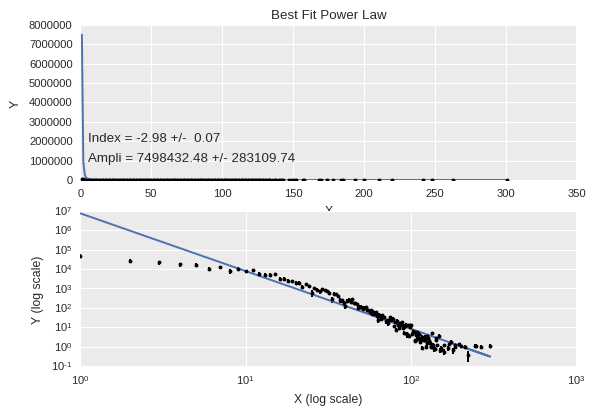

In [1335]:
fitPowLaw(xx,yy)

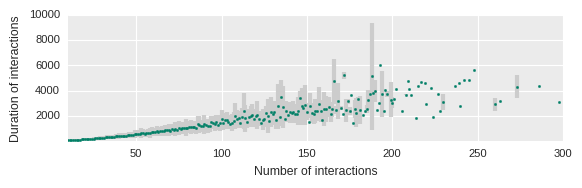

In [1110]:
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "#ebebeb"})
fig, ax = plt.subplots()
fig.set_size_inches(5.91553, 5.91553/3)
x = edgedataVAL.f
y = edgedataVAL.d
ax.errorbar(x, y, yerr=edgedataSD.d, linestyle="None", linewidth=3, capsize=0, ecolor="#cccccc")
ax.scatter(x=x, y=y, s=3, alpha=1, color='#007f66', zorder=3)
ax.set_xlim((10,300))
ax.set_ylim((10,10000))
ax.set_ylabel('Duration of interactions')
ax.set_xlabel('Number of interactions')

fig.tight_layout()
plt.savefig('n3-freqVSduration.pdf', bbox_inches='tight')

# Age difference between edges

In [1192]:
def getAgeDiff(g, start):

    ids = []
    count = 0
    for u,v in g.get_edgelist():
        if count < 100:
            e = g.es.select(_source=u, _target=v)
            ew = e['frequency'][0]
            u, v = ig.VertexSeq(g, [u, v])
            i = int(v.attributes().get("id"))
            j = int(u.attributes().get("id"))
            ids.append((i,j, ew))
            count = count + 1

    dftest = DataFrame(ids, columns=["n1","n2", "ew"])
    start_dt = datetime.datetime.strptime(start, "%Y-%m-%d").replace(tzinfo=pytz.UTC)
    aa = ht.get_all_bees_age(start_dt)
    dftest['age1'] = dftest.n1.apply(lambda x: aa.iloc[int(x)].age)
    dftest['age2'] = dftest.n2.apply(lambda x: aa.iloc[int(x)].age)
    
    return dftest

In [1193]:
ad1 = getAgeDiff(graphs_456[0][1], graphs_456[0][0])

In [1207]:
graphs_456[0][1].vs.select(id=1291).attributes()

['id']

In [1194]:
ad1

,n1,n2,ew,age1,age2
0,1291,3041,6.0,9,19
1,2378,3041,7.0,15,19
2,563,3041,6.0,10,19
3,714,3041,8.0,18,19
4,2755,3041,4.0,44,19
5,461,3041,10.0,37,19
6,3635,3041,4.0,5,19
7,2081,3041,1.0,19,19
8,146,3041,3.0,18,19
9,2798,3041,3.0,30,19


In [ ]:
ad2 = getAgeDiff(graphs_456[1][1], graphs_456[1][0])

In [ ]:
ad3 = getAgeDiff(graphs_456[2][1], graphs_456[2][0])

In [ ]:
ad_liste =[ad1, ad2, ad3]

In [286]:
ad1.to_csv("ad1.csv")

In [1211]:
ad1 = pd.read_csv("ad1.csv")

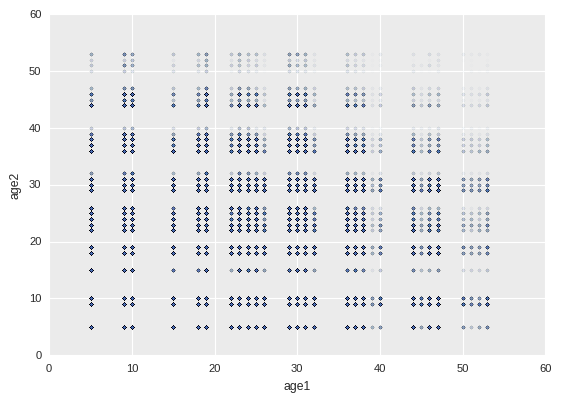

In [1218]:
ad1.query('age1 > 0 & age1 < 200 & age2 > 0 & age2 < 200').plot.scatter(x='age1', y='age2', s=5, alpha=0.01)

In [287]:
ad2.to_csv("ad2.csv")

In [288]:
ad3.to_csv("ad3.csv")

In [993]:
def plotEdgeAges(data):
    sns.set_context("paper")
    fig, ax = plt.subplots()
    fig.set_size_inches(5.91553/2,5.91553/3)
    df = data
    www = df.query('age1 >= 0 & age1 < 200 & age2 >=0 & age2 < 200')
    www = abs(www.age1-www.age2)

    ax.hist(www, bins=30)

    ax.set_ylabel('Frequency of edges')
    ax.set_xlabel('Age difference in days')
    fig.tight_layout()
    #plt.savefig('stat-edgeWeightDist.pdf')

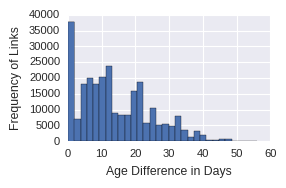

In [992]:
plotEdgeAges(pd.read_csv("ad3.csv"))

In [986]:
pd.read_csv("ad3.csv")

,Unnamed: 0,n1,n2,age1,age2
0,0,8,4,30,2
1,1,41,4,27,2
2,2,52,4,9,2
3,3,76,4,9,2
4,4,84,4,9,2
5,5,91,4,14,2
6,6,100,4,9,2
7,7,122,4,22,2
8,8,124,4,9,2
9,9,128,4,30,2


# Local CC

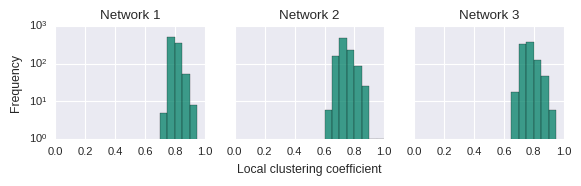

In [499]:
from matplotlib.ticker import ScalarFormatter

sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,5.91553/3)

for i, ax in enumerate(axn.flat):
    g = graphs_456[i][1]
    cc = g.transitivity_local_undirected()

    ax.hist(Series(cc).dropna(), bins=20, color='#007f66', alpha=0.75, range=(0,1))
    ax.set_yscale('log')
    ax.set_title("Network {}".format(i+1))
    
    #xfmt = ScalarFormatter(useMathText=True)
    #xfmt.set_powerlimits((0,0))
    #xfmt.set_useOffset(10)
    #ax.xaxis.set_major_formatter(xfmt)
    
    if (i == 0):
        ax.set_ylabel('Frequency')
    if (i == 1):
        ax.set_xlabel('Local clustering coefficient')

#plt.subplots_adjust(top=0.7)

#fig.suptitle("Age Distribution per Community")
fig.tight_layout()
plt.savefig('stat-lccDist.pdf')

# Centrality Measures

In [406]:
def addAttributesToNodes(g, start):
    
    start_dt = datetime.datetime.strptime(start, "%Y-%m-%d").replace(tzinfo=pytz.UTC)
    aa = ht.get_all_bees_age(start_dt)
    df = DataFrame([int(x) for x in list(g.nodes())], columns=['id'])
    df["age"] = df.id.apply(lambda x: aa.iloc[x].age)
    
    #degree unweighted
    deg = nx.degree(g)
    df['degree'] = df.id.apply(lambda x: deg.get(str(x)))
    
    #degree weighted - frequency and duration
    degF = nx.degree(g, weight='frequency')
    df['strength'] = df.id.apply(lambda x: degF.get(str(x)))

    #cc
    clust = nx.clustering(g)
    df['lcc'] = df.id.apply(lambda x: clust.get(str(x)))
    clustF = nx.clustering(g, weight='frequency')
    df['lccF'] = df.id.apply(lambda x: clustF.get(str(x)))
    clustFinv = nx.clustering(g, weight='finv')
    df['lccFinv'] = df.id.apply(lambda x: clustFinv.get(str(x)))
    
    # Betweenness Centrality
    between = nx.betweenness_centrality(g)
    df['between'] = df.id.apply(lambda x: between.get(str(x)))
    betweenF = nx.betweenness_centrality(g, weight='frequency')
    df['betweenF'] = df.id.apply(lambda x: betweenF.get(str(x)))
    betweenFinv = nx.betweenness_centrality(g, weight='finv')
    df['betweenFinv'] = df.id.apply(lambda x: betweenFinv.get(str(x)))
    
    # Closeness Centrality
    closeness = nx.closeness.closeness_centrality(g)
    df['closeness'] = df.id.apply(lambda x: closeness.get(str(x)))
    closenessF = nx.closeness.closeness_centrality(g, distance='frequency')
    df['closenessF'] = df.id.apply(lambda x: closenessF.get(str(x)))
    closenessFinv = nx.closeness.closeness_centrality(g, distance='finv')
    df['closenessFinv'] = df.id.apply(lambda x: closenessFinv.get(str(x)))
    
    # Eigenvector Centrality
    evc = nx.centrality.eigenvector_centrality_numpy(g, weight=None)
    df['evc'] = df.id.apply(lambda x: evc.get(str(x)))
    evcF = nx.centrality.eigenvector_centrality_numpy(g, weight="frequency")
    df['evcF'] = df.id.apply(lambda x: evcF.get(str(x)))
    evcFinv = nx.centrality.eigenvector_centrality_numpy(g, weight="finv")
    df['evcFinv'] = df.id.apply(lambda x: evcFinv.get(str(x)))
    
    return df

In [407]:
nxg0 = nx.read_graphml('networks/0820_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-20_08:00:00+00:00.graphml')

In [408]:
nxg1 = nx.read_graphml('networks/0822_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-22_08:00:00+00:00.graphml')

In [409]:
nxg2 = nx.read_graphml('networks/0824_10h_95conf_212dist_3ilen_2gap_600minutes_2016-08-24_08:00:00+00:00.graphml')

In [410]:
df0 = addAttributesToNodes(nxg0, '2016-08-20')

In [411]:
df0.to_csv('centrality-age-20.csv')

In [412]:
df1 = addAttributesToNodes(nxg1, '2016-08-22')

In [ ]:
df1.to_csv('centrality-age-22.csv')

In [500]:
df0.head()

,Unnamed: 0,id,age,degree,strength,lcc,lccF,lccFinv,between,betweenF,betweenFinv,closeness,closenessF,closenessFinv,evc,evcF,evcFinv
0,0,4058,10,600,3205,0.801503,0.013310,0.219118,0.000261,0.001216,0.000002,0.741546,0.535777,14.777992,0.030226,0.013797,0.037600
1,1,450,47,190,440,0.851351,0.007891,0.375235,0.000015,0.001219,0.000000,0.557169,0.532370,11.007958,0.009946,0.002063,0.021655
2,2,3701,31,805,8588,0.763907,0.020142,0.132705,0.000590,0.000408,0.000716,0.888139,0.519166,19.047570,0.039967,0.038616,0.027692
3,3,3017,19,277,1041,0.845681,0.010799,0.287508,0.000038,0.000814,0.000000,0.588123,0.526888,12.666333,0.014326,0.005013,0.023165
4,4,724,5,668,8957,0.813976,0.023500,0.154215,0.000414,0.000638,0.005075,0.783830,0.523593,20.975982,0.034027,0.052628,0.029206


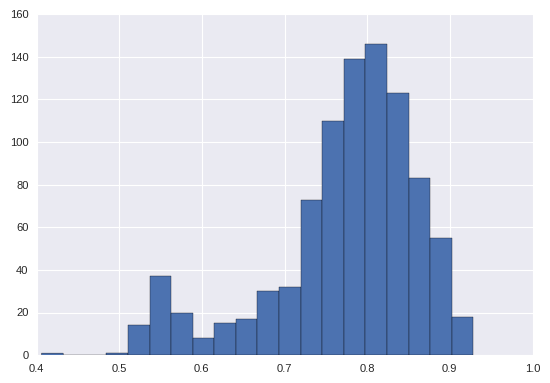

In [513]:
df0.closeness.hist(bins=20)

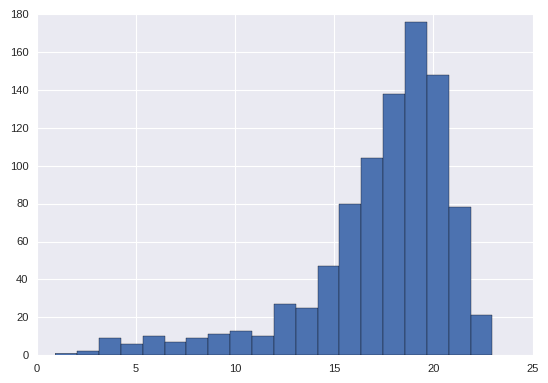

In [512]:
df0.closenessFinv.hist(bins=20)

In [ ]:
df2 = addAttributesToNodes(nxg2, '2016-08-24')

In [ ]:
df2.to_csv('centrality-age-24.csv')

In [577]:
df0 = pd.read_csv("centrality-age-20.csv")

In [578]:
df1 = pd.read_csv("centrality-age-22.csv")

In [579]:
df2 = pd.read_csv("centrality-age-24.csv")

In [580]:
df_centrality =[df0, df1, df2]

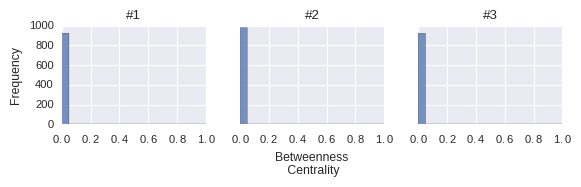

In [434]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True,  sharex=True)
fig.set_size_inches(5.91553,2)

for i, ax in enumerate(axn.flat):
    df = df_centrality[i]
    
    ax.hist(df.betweenFinv, bins=20, alpha=0.75, range=(0,1))
    ax.set_title("#{}".format(i+1))

    xfmt = ScalarFormatter(useMathText=True)
    xfmt.set_powerlimits((0,0))
    #xfmt.set_useOffset(10)
    ax.xaxis.set_major_formatter(xfmt)

    if (i == 0):
        ax.set_ylabel('Frequency')
    if (i == 1):
        ax.set_xlabel('Betweenness\n Centrality')

fig.tight_layout()
plt.savefig('stat-betweenDist.pdf')

In [624]:
def plotHists(df_centrality, thing, xlabel, savefile, yscale, range0=0, range1=1):
    sns.set_context("paper")
    fig, axn = plt.subplots(ncols=3, sharey=True,  sharex=True)
    fig.set_size_inches(5.91553,5.91553/3)

    for i, ax in enumerate(axn.flat):
        df = df_centrality[i]

        ax.hist(df[thing], bins=20, alpha=0.75, color='#007f66', range=(range0, range1))
        ax.set_title("Network {}".format(i+1))

        xfmt = ScalarFormatter(useMathText=True)
        xfmt.set_powerlimits((0,0))
        #xfmt.set_useOffset(10)
        ax.xaxis.set_major_formatter(xfmt)
        ax.set_yscale(yscale)

        if (i == 0):
            ax.set_ylabel('Frequency')
        if (i == 1):
            ax.set_xlabel(xlabel)

    fig.tight_layout()
    plt.savefig(savefile)

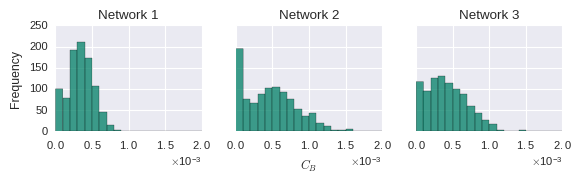

In [632]:
plotHists(df_centrality, 'between', '$C_B$', 'stat-betweenDist.pdf', 'linear', 0, 0.002)

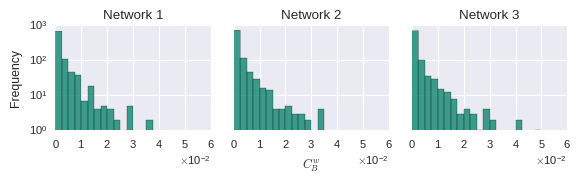

In [668]:
plotHists(df_centrality, 'betweenFinv', '$C_B^w$', 'stat-betweenWDist.pdf', 'log', 0, 0.05)

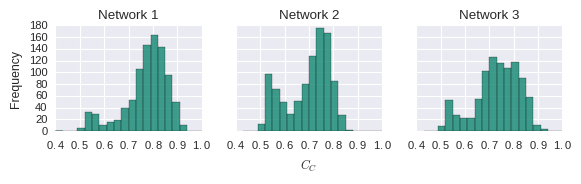

In [669]:
plotHists(df_centrality, 'closeness', '$C_C$', 'stat-closenessDist.pdf', 'linear', 0.4, 1)

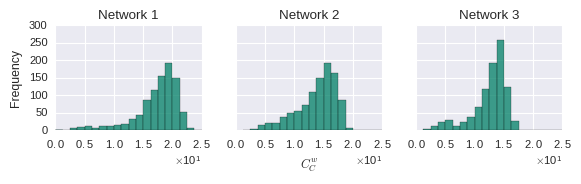

In [670]:
plotHists(df_centrality, 'closenessFinv', '$C_C^w$', 'stat-closenessWDist.pdf', 'linear', 0, 25)

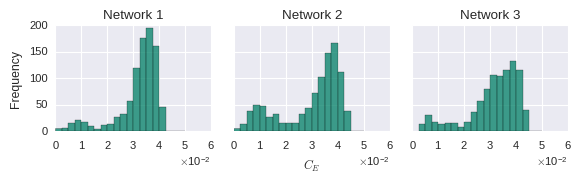

In [671]:
plotHists(df_centrality, 'evc', '$C_E$', 'stat-evcDist.pdf', 'linear', 0, 0.05)

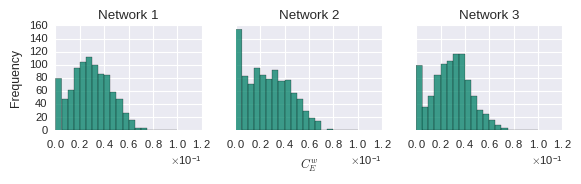

In [672]:
plotHists(df_centrality, 'evcF', '$C_E^w$', 'stat-evcWDist.pdf', 'linear', 0, 0.1)

In [344]:
df0.between.max()

0.002378855435816187

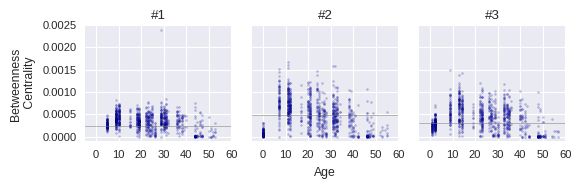

In [356]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,2)

for i, ax in enumerate(axn.flat):

    df = df_centrality[i]
    
    q = df[df.id==QUEEN].between
    q = q.iloc[0]
    
    df = df[df.age < 200] # queen raus
    df = df[df.age >= 0]
    ax.scatter(x=df.age, y=df.between, s=2, alpha=0.25)
    ax.set_title("#{}".format(i+1))
    ax.set_xlim((-5,60))
    ax.set_ylim((-0.0001,0.0025))
    
    ax.axhline(q, linewidth=0.5, color='0.5', linestyle='solid', alpha=0.75)
    #ax.text(60, 450, 'q', rotation=0)

    if (i == 0):
        ax.set_ylabel('Betweenness\n Centrality')
    if (i == 1):
        ax.set_xlabel('Age')

fig.tight_layout()
plt.savefig('stat-betweennessAge.pdf')

In [360]:
df2.betweenF.max()

0.0037261491961679749

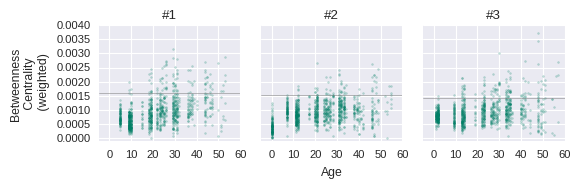

In [526]:
sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
fig.set_size_inches(5.91553,2)

for i, ax in enumerate(axn.flat):

    df = df_centrality[i]
    
    q = df[df.id==QUEEN].betweenF
    q = q.iloc[0]
    
    df = df[df.age < 200] # queen raus
    df = df[df.age >= 0]
    ax.scatter(x=df.age, y=df.betweenF, s=2, alpha=0.25, color="#007f66")
    ax.set_title("#{}".format(i+1))
    ax.set_xlim((-5,60))
    ax.set_ylim((-0.0001,0.004))
    
    ax.axhline(q, linewidth=0.5, color='0.5', linestyle='solid', alpha=0.75)
    #ax.text(60, 450, 'q', rotation=0)

    if (i == 0):
        ax.set_ylabel('Betweenness\n Centrality \n (weighted)')
    if (i == 1):
        ax.set_xlabel('Age')

fig.tight_layout()
plt.savefig('stat-betweennessWAge.pdf')

In [28]:
def plotter(liste, attribut, ymin, ymax, filename, labeltxt):
    sns.set_context("paper")
    fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
    fig.set_size_inches(5.91553,5.91553/3)

    for i, ax in enumerate(axn.flat):

        df = liste[i]

        q = df[df.id==QUEEN][attribut]
        q = q.iloc[0]

        df = df[df.age < 200] # queen raus
        df = df[df.age >= 0]
        ax.scatter(x=df.age, y=df[attribut], s=2, alpha=0.2, color='#007f66')
        ax.set_title("Network {}".format(i+1))
        ax.set_xlim((-5,60))
        ax.set_ylim((ymin,ymax))

        ax.axhline(q, linewidth=0.5, color='0.5', linestyle='solid', alpha=0.75)

        if (i == 0):
            ax.set_ylabel(labeltxt)
        if (i == 1):
            ax.set_xlabel('Age')

    fig.tight_layout()
    plt.savefig(filename) 

In [394]:
df2.closenessF.max()

0.56330275229357796

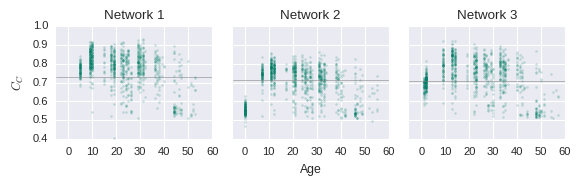

In [572]:
plotter(df_centrality, "closeness", 0.4, 1, "stat-closenessAge.pdf", "$C_C$")

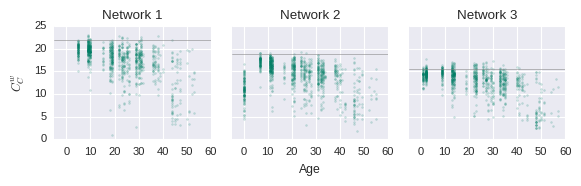

In [571]:
plotter(df_centrality, "closenessFinv", 0, 25, "stat-closenessWAge.pdf", "$C_C^w$")

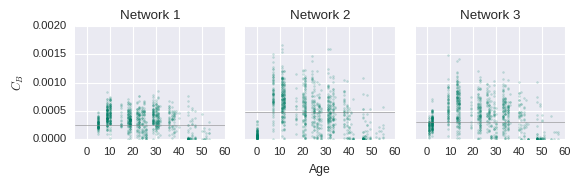

In [570]:
plotter(df_centrality, "between", 0, 0.002, "stat-betweenAge.pdf", "$C_B$")

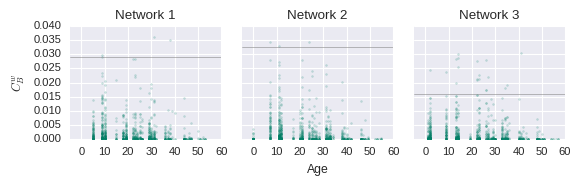

In [569]:
plotter(df_centrality, "betweenFinv", 0, 0.04, "stat-betweenWAge.pdf", "$C_B^w$")

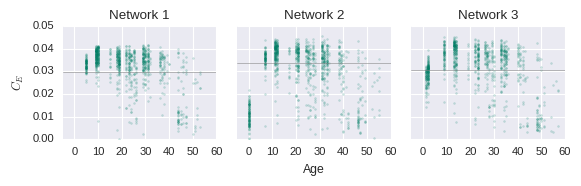

In [568]:
plotter(df_centrality, "evc", 0, 0.05, "stat-evcAge.pdf", "$C_E$")

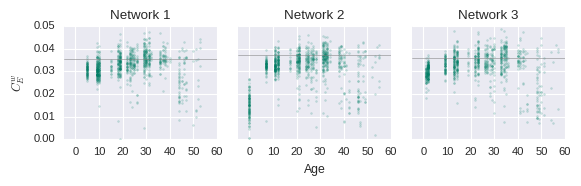

In [567]:
plotter(df_centrality, "evcFinv", 0, 0.05, "stat-evcWAge.pdf", "$C_E^w$")

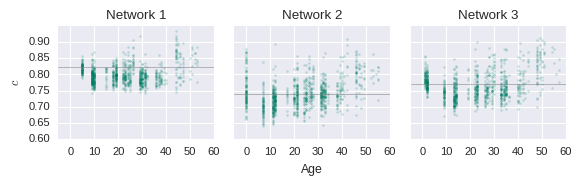

In [585]:
plotter(df_centrality, "lcc", 0.6, 0.95, "stat-lccAge.pdf", "$c$")

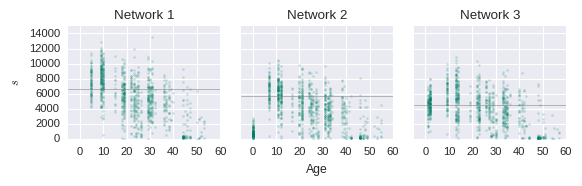

In [584]:
plotter(df_centrality, "strength", 0, 15000, "stat-strengthAge.pdf", "$s$")

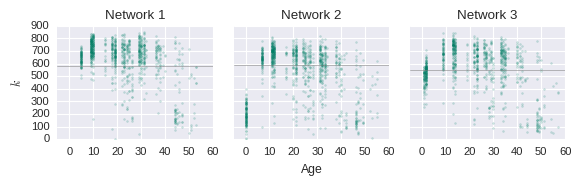

In [583]:
plotter(df_centrality, "degree", 0, 900, "stat-degreeAge.pdf", "$k$")

# Detection Frequency VS Age, Degree, Strength

In [581]:
freqList = ['ID_frequencies_2016-08-20_95conf_24h.csv', 'ID_frequencies_2016-08-22_95conf_24h.csv', 'ID_frequencies_2016-08-24_95conf_24h.csv']

In [582]:
def addFtoDF(df, flist):
    
    for e, f in enumerate(flist):
        idf = pd.read_csv(f, names=['id', 'detfreq'])
        df[e] = df[e].merge(idf, on='id')
        df[e].degree = df[e].degree/df[e].shape[0]
        df[e].detfreq = df[e].detfreq/(24*60*60*3.5)
        df[e]['degnorm'] = df[e].degree/df[e].detfreq
        df[e]['strengthnorm'] = df[e].strength/df[e].detfreq
        df[e]['lccnorm'] = df[e].lcc/df[e].detfreq
        df[e]['betweennorm'] = df[e].between/df[e].detfreq
        df[e]['closenessnorm'] = df[e].closeness/df[e].detfreq
    
    return df

In [583]:
testDF = addFtoDF(df_centrality, freqList)

In [807]:
dfd20 = df_centrality[0]

In [813]:
dfd20.head()

,Unnamed: 0,id,age,degree,strength,lcc,lccF,lccFinv,between,betweenF,...,closenessFinv,evc,evcF,evcFinv,detfreq,degnorm,strengthnorm,lccnorm,betweennorm,closenessnorm
0,0,4058,10,0.650759,3205,0.801503,0.013310,0.219118,0.000261,0.001216,...,14.777992,0.030226,0.013797,0.037600,0.115479,5.635279,27753.844392,6.940648,0.002263,6.421451
1,1,450,47,0.206074,440,0.851351,0.007891,0.375235,0.000015,0.001219,...,11.007958,0.009946,0.002063,0.021655,0.024957,8.257149,17630.316682,34.112683,0.000599,22.325141
2,2,3701,31,0.873102,8588,0.763907,0.020142,0.132705,0.000590,0.000408,...,19.047570,0.039967,0.038616,0.027692,0.359011,2.431963,23921.256390,2.127808,0.001644,2.473847
3,3,3017,19,0.300434,1041,0.845681,0.010799,0.287508,0.000038,0.000814,...,12.666333,0.014326,0.005013,0.023165,0.082576,3.638268,12606.559609,10.241237,0.000458,7.122193
4,4,724,5,0.724512,8957,0.813976,0.023500,0.154215,0.000414,0.000638,...,20.975982,0.034027,0.052628,0.029206,0.365420,1.982683,24511.522764,2.227509,0.001134,2.145011


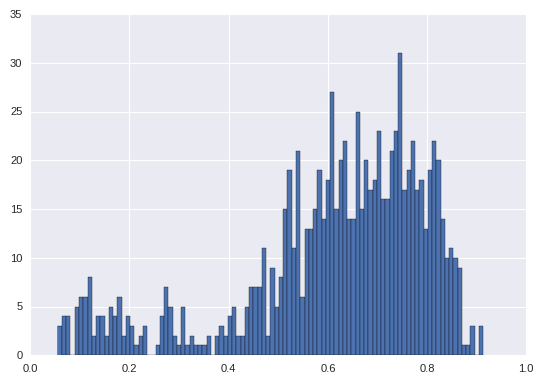

In [840]:
dfd24.degree.hist(bins=100)

In [858]:
dfd20_oldd = dfd20[dfd20.degree < 0.4]

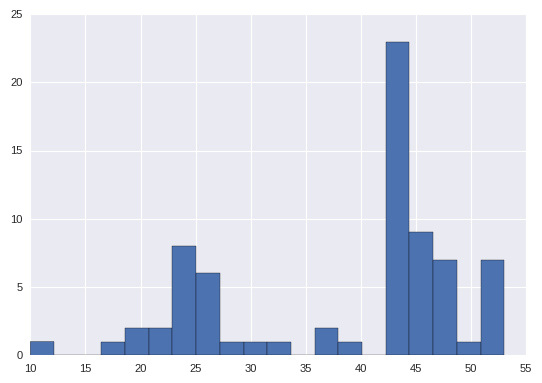

In [894]:
dfd20_oldd[dfd20_oldd.age > -100].age.hist(bins=20)

In [886]:
len(dfd20_oldd[dfd20_oldd.age > 25])

59

In [847]:
dfd22_oldd = dfd22[dfd22.degree < 0.4]

In [848]:
dfd24_oldd = dfd24[dfd24.degree < 0.4]

In [849]:
idold20 = set(dfd20_oldd.id)

In [850]:
idold22 = set(dfd22_oldd.id)

In [851]:
idold24 = set(dfd24_oldd.id)

In [861]:
len(idold20), len(idold22), len(idold24)

(84, 247, 120)

In [862]:
id20all = set(dfd20.id)

In [863]:
id22all = set(dfd22.id)

In [864]:
id24all = set(dfd24.id)

In [865]:
len(id20all), len(id22all), len(id24all)

(922, 978, 922)

In [866]:
len(idold20.intersection(id22all))

42

In [867]:
len(idold20.intersection(id24all))

41

In [868]:
len(idold22.intersection(id24all))

174

In [869]:
922-978

-56

In [819]:
dfd22 = df_centrality[1]

In [809]:
dfd24 = df_centrality[2]

In [401]:
testDF[0].degree.max()

0.9219088937093276

In [486]:
alldata = pd.concat(testDF).query('age > 0 and age < 200')

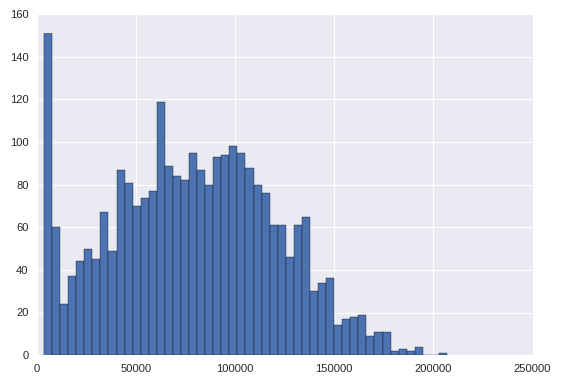

In [1034]:
alldata.detfreq.hist(bins=50)

In [488]:
alldata2 = DataFrame(alldata.query('age > 0 and age < 200').groupby(by='age').detfreq.mean(), columns=['detfreq']).reset_index()

alldata2err = DataFrame(alldata.query('age > 0 and age < 200').groupby(by='age').detfreq.std(), columns=['detfreq']).reset_index()

In [977]:
snapshot3data = DataFrame(testDF[2].query('age > 0 and age < 200').groupby(by='age').detfreq.mean(), columns=['detfreq']).reset_index()
snapshot3dataerr = DataFrame(testDF[2].query('age > 0 and age < 200').groupby(by='age').detfreq.std(), columns=['detfreq']).reset_index()

## Fit age vs det freq

In [1125]:
def plotn3Reg(df, err):
    sns.set_context("paper")
    sns.set_style("darkgrid", {"axes.facecolor": "#ebebeb"})
    fig, ax = plt.subplots()
    fig.set_size_inches(5.91553, 5.91553/3)
    
    x = df['age']
    y = df['detfreq']*100
    err = err['detfreq']*100
    fit = np.polyfit(x, y, deg=1)

    ax.plot(x, fit[0] * x + fit[1], color='#cb9f0a', linewidth=2)
    ax.scatter(x, y, color='#007f66', s=10, zorder=3)
    ax.set_xlim(0, 60)
    ax.set_ylim(0,50)
    ax.set_ylabel('Detection frequency in %')
    
    ax.errorbar(x, y, yerr=err, linestyle="None", linewidth=1, capsize=0, ecolor="#cccccc")

    ax.set_xlabel('Age in days')

    fig.tight_layout()
    plt.savefig('n3_detFvsAge.pdf', bbox_inches='tight')

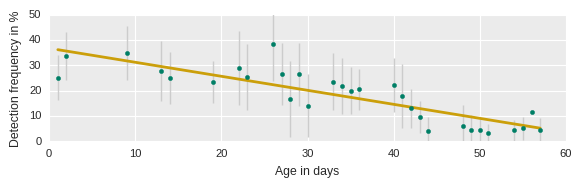

In [1126]:
plotn3Reg(snapshot3data, snapshot3dataerr)

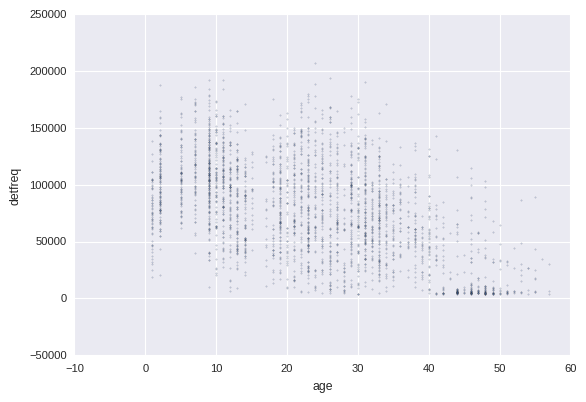

In [995]:
alldata.query('age > 0 and age < 200').plot.scatter(x='age', y='detfreq', s=1, alpha=0.25)

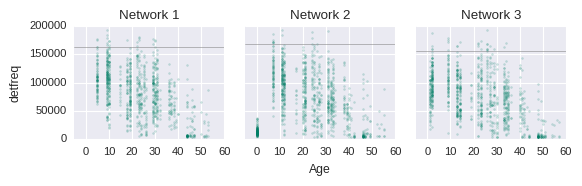

In [32]:
plotter(testDF, "detfreq", 0, 200000, "detF_age.pdf", "detfreq")

## Detection Frequency VS Degree/Strength LCC

In [33]:
def plotter2(liste, attribut1, attribut2, ymin, ymax, xmin, xmax, filename, xlabeltxt, ylabeltxt):
    sns.set_context("paper")
    fig, axn = plt.subplots(ncols=3, sharey=True, sharex=True)
    fig.set_size_inches(5.91553,5.91553/3)

    for i, ax in enumerate(axn.flat):

        df = liste[i]

        q = df[df.id==QUEEN][attribut1]
        q = q.iloc[0]


        ax.scatter(x=df[attribut2], y=df[attribut1], s=2, alpha=0.2, color='#007f66')
        ax.set_title("Network {}".format(i+1))
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((ymin,ymax))

        ax.axhline(q, linewidth=0.5, color='0.5', linestyle='solid', alpha=0.75)

        if (i == 0):
            ax.set_ylabel(xlabeltxt)
        if (i == 1):
            ax.set_xlabel(ylabeltxt)

    fig.tight_layout()
    plt.savefig(filename) 

In [209]:
np.arange(0,1,1/20)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95])

In [1380]:
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

In [1388]:
def plotThingAgeDetFC(data, col, xlabel, ylabel, snapshotnr, rangeA=0, rangeB=1, ylimA=0, ylimB=150, bins=20, a='a', b='b', c='c'):

    df_max = data.detfreq.max()
    
    q_df  = data[data.id == QUEEN].detfreq
    q_val = data[data.id == QUEEN][col]
    q_df = q_df.iloc[0]
    q_val = q_val.iloc[0]
    print('detf:', q_df, 'val', q_val)
    
    sns.set_style("darkgrid")
    sns.set_context("paper")
    sns.set_style("darkgrid", {"axes.facecolor": "#ebebeb"})
    fig, axn = plt.subplots(ncols=3)
    fig.set_size_inches(5.91553,5.91553/3.25)
    
    data = data.query('age >= 0 and age < 200')
    
    # Hist Plot
    ecolor= 'white'
    lw = 0
    al = 1
    axn[0].hist(data[col], bins=bins, color='#007f66', range=(rangeA, rangeB), alpha=al, edgecolor=ecolor, linewidth=lw)
    axn[0].set_ylim(ylimA, ylimB)
    axn[0].set_ylabel(ylabel)
    axn[0].axvline(x=data[col].mean(), linewidth=1, color = '#cb9f0a')
    axn[0].axvline(x=data[col].median(), linewidth=1, color = '#cb9f0a', linestyle="dotted")
    at = AnchoredText("{}".format(a), prop=dict(size=8), frameon=False, loc=1)
    axn[0].add_artist(at)
    
    # Plot with age
    binage = 60
    agestep = 1
    agelabels = list(np.arange(0,60,agestep))
    data['age-bin'] = pd.cut(data.age, binage, labels=agelabels)
    meanT = data.groupby(by='age-bin')[col].mean()
    stdT = data.groupby(by='age-bin')[col].std()
    #axn[2].axvline(x=q_val, linewidth=1, color = '#cb9f0a', alpha=0.75)
    axn[2].scatter(meanT, agelabels, s=3, color='#007f66', zorder=3)
    axn[2].errorbar(meanT, agelabels, xerr=stdT, linestyle="None", linewidth=1, capsize=0, ecolor="#cccccc")
    #axn[2].set_xlabel('Degree $k$')
    axn[2].set_ylabel('Age in days')
    #axn[1].set_xticklabels(agelabels[::10]+[60],rotation='45')
    axn[2].set_ylim(0,60)
    axn[2].set_xlim(rangeA,rangeB)
    at = AnchoredText("{}".format(c), prop=dict(size=8), frameon=False, loc=1)
    axn[2].add_artist(at)

    # Plot with detection frequency
    bindetf = 20
    detfstep = 1/20
    detflabels = list(np.arange(0,1,detfstep))
    data['detf-bin'] = pd.cut(data.detfreq, bindetf, labels=detflabels)
    meanT = data.groupby(by='detf-bin')[col].mean()
    stdT = data.groupby(by='detf-bin')[col].std()
    axn[1].scatter(meanT, detflabels, s=3, color='#007f66', zorder=3)
    axn[1].errorbar(meanT, detflabels, xerr=stdT, linestyle="None", linewidth=1, capsize=0, ecolor="#cccccc")
    axn[1].set_xlabel(xlabel)
    axn[1].set_ylabel('Detection frequency')
    axn[1].set_ylim(0,1)
    axn[1].set_xlim(rangeA,rangeB)
    at = AnchoredText("{}".format(b), prop=dict(size=8), frameon=False, loc=1)
    axn[1].add_artist(at)

    for label in axn[0].get_xmajorticklabels() + axn[1].get_xmajorticklabels() + axn[2].get_xmajorticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")
    
    if (col == 'strength' or col == 'between'):
        xfmt = ScalarFormatter(useMathText=True)
        xfmt.set_powerlimits((0,0))
        #xfmt.set_useOffset(10)
        axn[0].xaxis.set_major_formatter(xfmt)
        axn[1].xaxis.set_major_formatter(xfmt)
        axn[2].xaxis.set_major_formatter(xfmt)

    fig.tight_layout()
    plt.savefig('n{}-stat-{}AgeDetF.pdf'.format(snapshotnr, col), bbox_inches='tight', dpi=300)

detf: 0.513740079365 val 0.592190889371


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


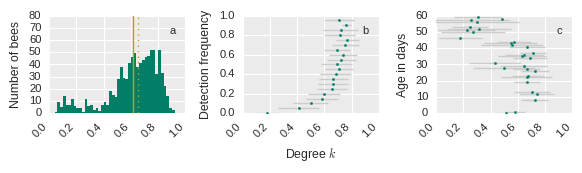

In [1389]:
plotThingAgeDetFC(testDF[2], 'degree', 'Degree $k$', 'Number of bees', '3', bins=50, ylimB=80, a='a', b='b', c='c')

detf: 0.54025462963 val 0.634490238612


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


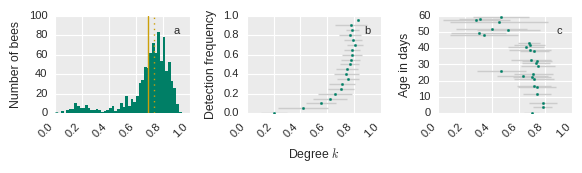

In [1390]:
plotThingAgeDetFC(testDF[0], 'degree', 'Degree $k$', 'Number of bees', '1', bins=50, ylimB=100)

detf: 0.558290343915 val 0.600204498978

/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


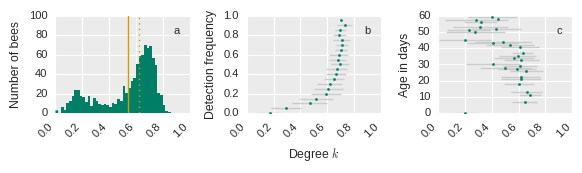

In [1391]:
plotThingAgeDetFC(testDF[1], 'degree', 'Degree $k$', 'Number of bees', '2', bins=50, ylimB=100)

detf: 0.513740079365 val 4495


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


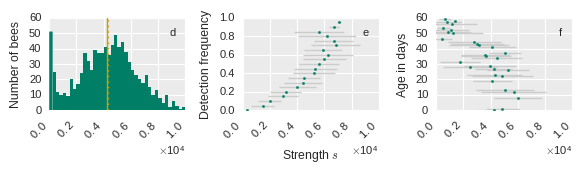

In [1392]:
plotThingAgeDetFC(testDF[2], 'strength', 'Strength $s$', 'Number of bees', '3', rangeA=0, rangeB=10000, bins=40, ylimB=60, a='d', b='e', c='f')

detf: 0.54025462963 val 6631


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


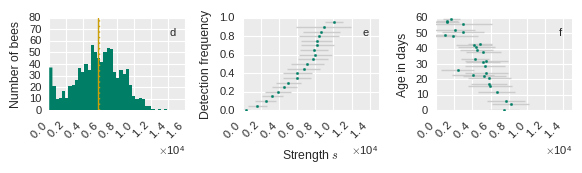

In [1393]:
plotThingAgeDetFC(testDF[0], 'strength', 'Strength $s$', 'Number of bees', '1', rangeA=0, rangeB=15000, bins=40, ylimB=80, a='d', b='e', c='f')

detf: 0.558290343915 val 5788


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


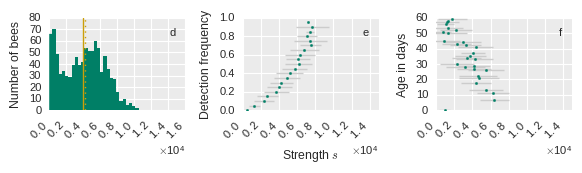

In [1394]:
plotThingAgeDetFC(testDF[1], 'strength', 'Strength $s$', 'Number of bees', '2', rangeA=0, rangeB=15000, bins=40, ylimB=80, a='d', b='e', c='f')

detf: 0.513740079365 val 0.770743018449


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


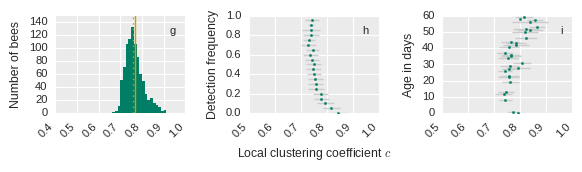

In [1398]:
plotThingAgeDetFC(testDF[2], 'lcc', 'Local clustering coefficient $c$', 'Number of bees', '3', rangeA=0.5, rangeB=1, ylimB= 150, bins=40, a='g', b='h', c='i')

detf: 0.54025462963 val 0.823767708699


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


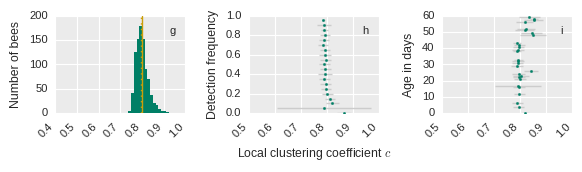

In [1399]:
plotThingAgeDetFC(testDF[0], 'lcc', 'Local clustering coefficient $c$', 'Number of bees', '1', rangeA=0.5, rangeB=1, ylimB= 200, bins=40, a='g', b='h', c='i')

detf: 0.558290343915 val 0.73888168567


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


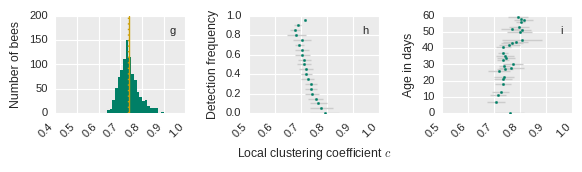

In [1400]:
plotThingAgeDetFC(testDF[1], 'lcc', 'Local clustering coefficient $c$', 'Number of bees', '2', rangeA=0.5, rangeB=1, ylimB= 200, bins=40, a='g', b='h', c='i')

detf: 0.513740079365 val 0.000307705933745


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


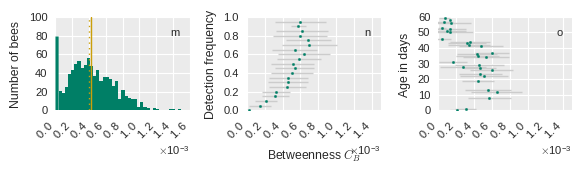

In [1404]:
plotThingAgeDetFC(testDF[2], 'between', 'Betweenness $C_B$', 'Number of bees', '3', rangeA=0, rangeB=0.0015, ylimB= 100, bins=40, a='m', b='n', c='o')

detf: 0.54025462963 val 0.000247685834867


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


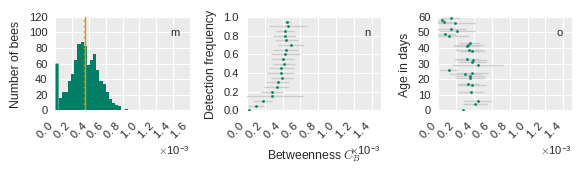

In [1405]:
plotThingAgeDetFC(testDF[0], 'between', 'Betweenness $C_B$', 'Number of bees', '1', rangeA=0, rangeB=0.0015, ylimB= 120, bins=40, a='m', b='n', c='o')

detf: 0.558290343915 val 0.000480468412611


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


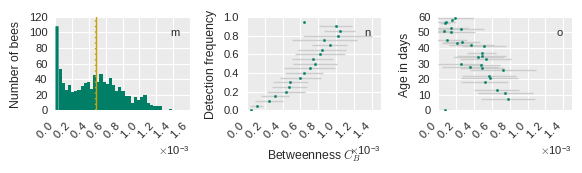

In [1406]:
plotThingAgeDetFC(testDF[1], 'between', 'Betweenness $C_B$', 'Number of bees', '2', rangeA=0, rangeB=0.0015, ylimB= 120, bins=40, a='m', b='n', c='o')

detf: 0.513740079365 val 0.710648148148


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


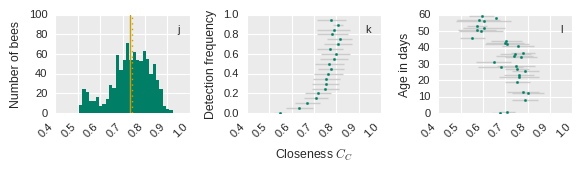

In [1407]:
plotThingAgeDetFC(testDF[2], 'closeness', 'Closeness $C_C$', 'Number of bees', '3', rangeA=0.4, rangeB=1, ylimB= 100, bins=40, a='j', b='k', c='l')

detf: 0.54025462963 val 0.732114467409


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


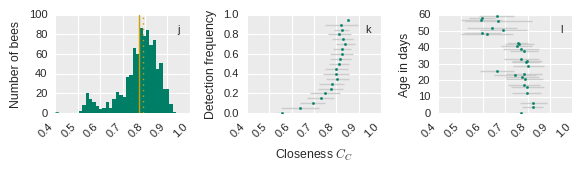

In [1408]:
plotThingAgeDetFC(testDF[0], 'closeness', 'Closeness $C_C$', 'Number of bees', '1', rangeA=0.4, rangeB=1, ylimB= 100, bins=40, a='j', b='k', c='l')

detf: 0.558290343915 val 0.714703730797


/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


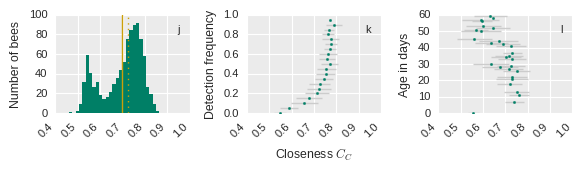

In [1409]:
plotThingAgeDetFC(testDF[1], 'closeness', 'Closeness $C_C$', 'Number of bees', '2', rangeA=0.4, rangeB=1, ylimB= 100, bins=40, a='j', b='k', c='l')

## Pairplots

In [1145]:

from pandas.tools.plotting import scatter_matrix

def plotmatrixScatter(data,ss):

    sns.set_context("paper")
    sns.set_style("dark")
    sns.set_style("darkgrid", {"axes.facecolor": "#ebebeb"})
    fig, ax = plt.subplots()
    fig.set_size_inches(5.91553, 5.91553)

    ecolor= 'white'
    lw = 0
    al = 1

    axn = scatter_matrix(data,
                   marker='+',
                   c='#007f66',
                   alpha=0.1, hist_kwds={'bins':20, 'color': '#007f66', 'alpha':al, 'edgecolor':ecolor, 'linewidth':lw},
                   ax=ax,
                   grid=False)
    axn[0][0].set_ylabel('Degree')
    axn[1][0].set_ylabel('Strength')
    axn[2][0].set_ylabel('Lcc')
    axn[3][0].set_ylabel('Betweenness')
    axn[4][0].set_ylabel('Closeness')
    axn[4][0].set_xlabel('Degree')
    axn[4][1].set_xlabel('Strength')
    axn[4][2].set_xlabel('Lcc')
    axn[4][3].set_xlabel('Betweenness')
    axn[4][4].set_xlabel('Closeness')

    fig.tight_layout()
    plt.savefig('n{}_scatter.pdf'.format(ss))

/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  from ipykernel import kernelapp as app
/home/mi/aschle/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  app.launch_new_instance()


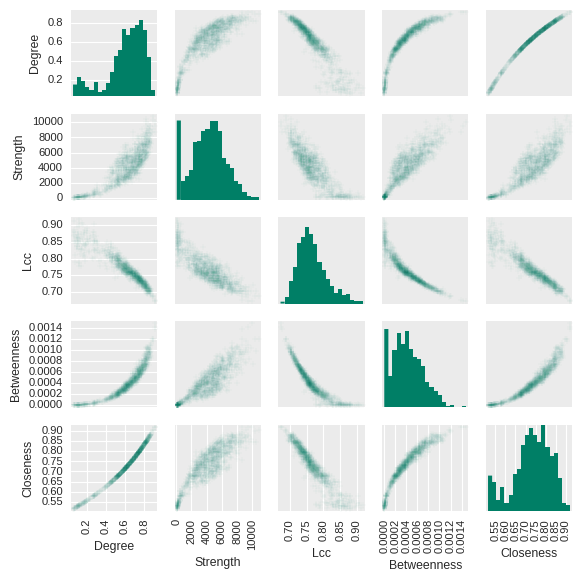

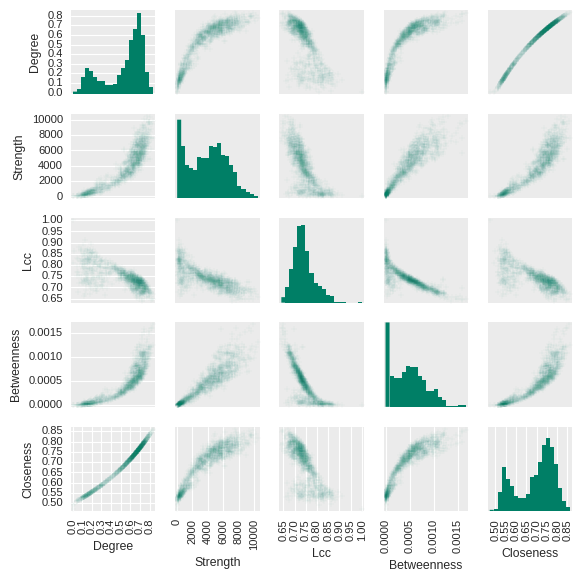

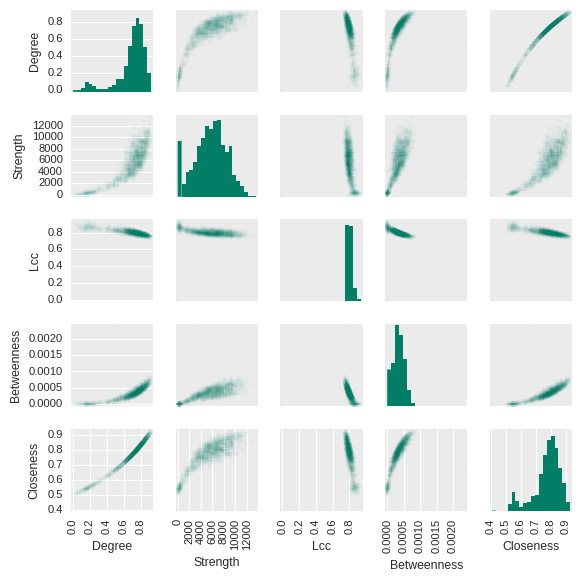

In [1146]:
plotmatrixScatter(testDF[2][['degree', 'strength', 'lcc', 'between', 'closeness']], '3')
plotmatrixScatter(testDF[1][['degree', 'strength', 'lcc', 'between', 'closeness']], '2')
plotmatrixScatter(testDF[0][['degree', 'strength', 'lcc', 'between', 'closeness']], '1')

(0, 60)

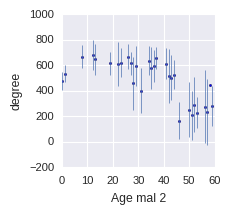

In [637]:
meanT = testDF2.groupby(by='age-bin').degree.mean()
stdT = testDF2.groupby(by='age-bin').degree.std()
fig, ax = plt.subplots()
fig.set_size_inches(5.91553/3,5.91553/3)
ax.scatter(list(range(60)), meanT, s=3)
ax.errorbar(list(range(60)), meanT,yerr=stdT, linestyle="None", linewidth=0.5)
ax.set_ylabel('degree')
ax.set_xlabel('Age mal 2')
ax.set_xlim(0,60)

(0, 30)

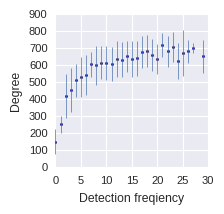

In [113]:
meanT = testDF2.groupby(by='detf-bin').degree.mean()
stdT = testDF2.groupby(by='detf-bin').degree.std()
fig, ax = plt.subplots()
fig.set_size_inches(5.91553/3,5.91553/3)
ax.scatter(list(range(30)), meanT, s=3)
ax.errorbar(list(range(30)), meanT, yerr=stdT, linestyle="None", linewidth=0.5)
ax.set_ylabel('Degree')
ax.set_xlabel('Detection freqiency')
ax.set_xlim(0,30)

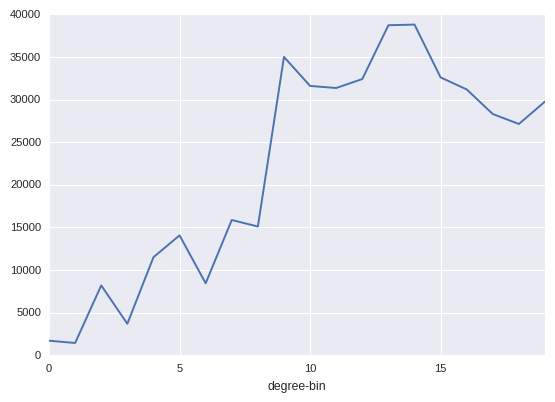

In [56]:
testDF[2].groupby(by='degree-bin').detfreq.std().plot()

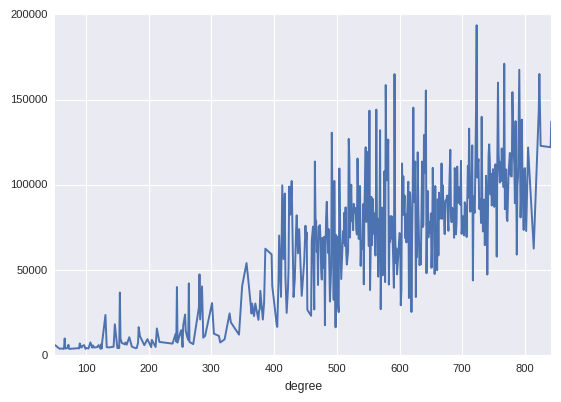

In [43]:
testDF[2].groupby(by='degree').detfreq.mean().plot()

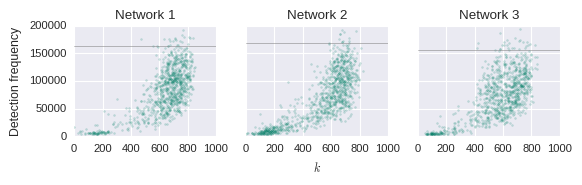

In [38]:
plotter2(testDF, "detfreq", "degree", 0, 200000, 0, 1000, "detF_degree.pdf", "Detection frequency", '$k$')

In [737]:
def getMax(df, attribut):
    m = []
    for d in df:
        ma = d[attribut].max()
        m.append(ma)
        print(ma)
    
    return max(m)
        

In [747]:
getMax(testDF, 'lcc')

0.934863288647
1.0
0.916298116298


1.0

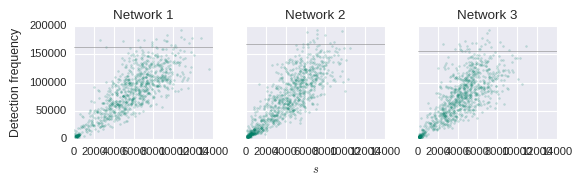

In [790]:
plotter2(testDF, "detfreq", "strength", 0, 200000, 0, 14000, "detF_strength.pdf", "Detection frequency", '$s$')

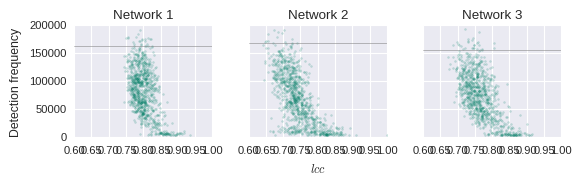

In [801]:
plotter2(testDF, "detfreq", "lcc", 0, 200000, 0.6, 1, "detF_lcc.pdf", "Detection frequency", '$lcc$')

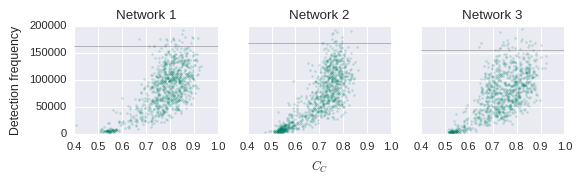

In [802]:
plotter2(testDF, "detfreq", "closeness", 0, 200000, 0.4, 1, "detF_closenessUW.pdf", "Detection frequency", '$C_C$')

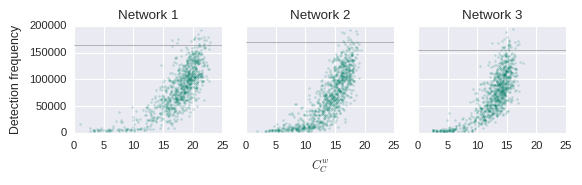

In [793]:
plotter2(testDF, "detfreq", "closenessFinv", 0, 200000, 0, 25, "detF_closenessW.pdf", "Detection frequency", '$C_C^w$')

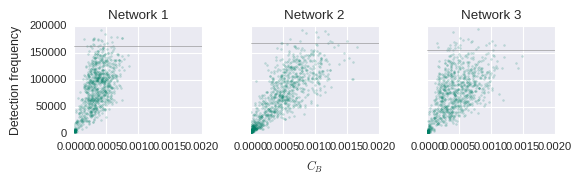

In [794]:
plotter2(testDF, "detfreq", "between", 0, 200000, 0, 0.002, "detF_betweenUW.pdf", "Detection frequency", '$C_B$')

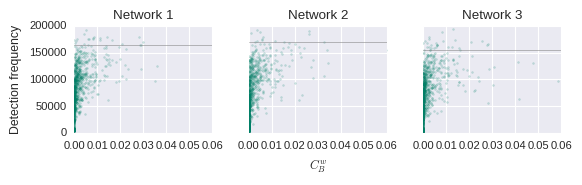

In [795]:
plotter2(testDF, "detfreq", "betweenFinv", 0, 200000, 0, 0.06, "detF_betweenW.pdf", "Detection frequency", '$C_B^w$')

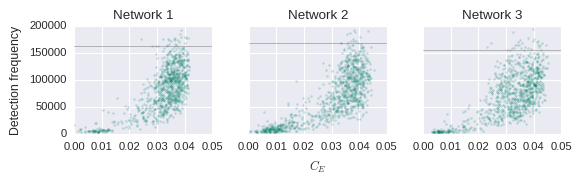

In [803]:
plotter2(testDF, "detfreq", "evc", 0, 200000, 0, 0.05, "detF_evcUW.pdf", "Detection frequency", '$C_E$')

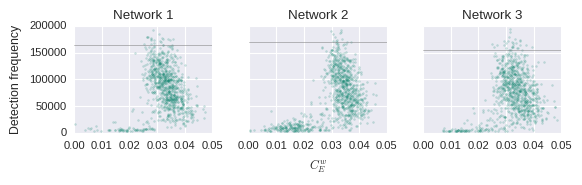

In [804]:
plotter2(testDF, "detfreq", "evcFinv", 0, 200000, 0, 0.05, "detF_evcW.pdf", "Detection frequency", '$C_E^w$')

# Disparity

In [438]:
import pythonbackbonenetwork.backbone as bb

In [40]:
gt = graphs_456[0][1]

In [41]:
gt.write_graphml('ttt.graphml')
g = nx.read_graphml('ttt.graphml')

In [58]:
%timeit np.square(np.array([1,2,3]))

The slowest run took 8.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.39 µs per loop


In [63]:
def getDisparity(g):
    
    g.write_graphml('ttt.graphml')
    g = nx.read_graphml('ttt.graphml')
    
    y2_liste = []
    for u in g:
        y2 = 0
        for v in g[u]:
            w = g[u][v]['frequency']
            s = sum(g[u][v]['frequency'] for v in g[u])
            y2 += (w/s)*(w/s)
        y2_liste.append(y2)
    
    return y2_liste

In [64]:
d0 = getDisparity(graphs_456[0][1])

In [65]:
d1 = getDisparity(graphs_456[1][1])

In [66]:
d2 = getDisparity(graphs_456[2][1])

In [67]:
dd = [d0,d1,d2]

In [97]:
Series(d2).to_csv("disparity-24.csv")

In [102]:
sd0 = Series(d0)

In [115]:
sd1 = Series(d1)

In [119]:
sd2 = Series(d2)

In [124]:
sd1.max()

0.59375

In [121]:
c = 0
g = graphs_456[2][1]
g.write_graphml('ttt.graphml')
g = nx.read_graphml('ttt.graphml')

In [122]:
c = 0
for v in g:
    if c == 361:
        print(v)
        print(g[v])
    c += 1

n848
{'n173': {'totalduration': 3.0, 'frequency': 1.0}, 'n183': {'totalduration': 9.0, 'frequency': 2.0}, 'n25': {'totalduration': 62.0, 'frequency': 6.0}, 'n591': {'totalduration': 3.0, 'frequency': 1.0}, 'n623': {'totalduration': 3.0, 'frequency': 1.0}, 'n620': {'totalduration': 3.0, 'frequency': 1.0}, 'n412': {'totalduration': 7.0, 'frequency': 2.0}, 'n825': {'totalduration': 4.0, 'frequency': 1.0}, 'n193': {'totalduration': 4.0, 'frequency': 1.0}, 'n43': {'totalduration': 10.0, 'frequency': 2.0}, 'n632': {'totalduration': 3.0, 'frequency': 1.0}, 'n327': {'totalduration': 4.0, 'frequency': 1.0}, 'n338': {'totalduration': 4.0, 'frequency': 1.0}, 'n548': {'totalduration': 3.0, 'frequency': 1.0}, 'n190': {'totalduration': 10.0, 'frequency': 2.0}, 'n161': {'totalduration': 6.0, 'frequency': 1.0}, 'n557': {'totalduration': 7.0, 'frequency': 2.0}, 'n673': {'totalduration': 3.0, 'frequency': 1.0}, 'n14': {'totalduration': 3.0, 'frequency': 1.0}, 'n385': {'totalduration': 13.0, 'frequency':

In [129]:
(4/7)*(4/7)

0.32653061224489793

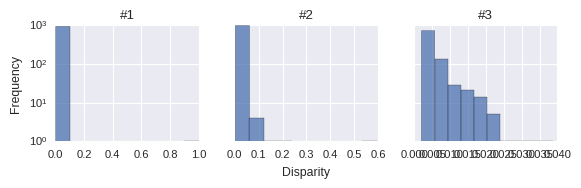

In [98]:
from matplotlib.ticker import ScalarFormatter

sns.set_context("paper")
fig, axn = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(5.91553,2)

for i, ax in enumerate(axn.flat):
    ax.hist(dd[i], alpha=0.75)
    ax.set_title("#{}".format(i+1))
    ax.set_yscale('log')
        
    if (i == 0):
        ax.set_ylabel('Frequency')
    if (i == 1):
        ax.set_xlabel('Disparity')

fig.tight_layout()
#plt.savefig('stat-disparityDist.pdf')

In [330]:
t = graphs[6][1]

In [331]:
start_dt = datetime.datetime.strptime("2016-08-24", "%Y-%m-%d").replace(tzinfo=pytz.UTC)
aa = ht.get_all_bees_age(start_dt)

ids = []
for v in t.vs:
    id = v.attributes().get("id")
    id = int(id)
    ids.append(id)

df = DataFrame(ids, columns=['id'])
df["age"] = df.id.apply(lambda x: aa.iloc[x].age)

#degree unweighted
deg = t.degree()
degF = t.strength(weights="frequency")

In [332]:
df['degree'] = deg
df['degreeF'] = degF

In [328]:
def scatterPlot(df, x, y):
    df.plot.scatter(x=x, y=y, s=8, alpha=0.5)
    plt.figure()
    df.plot.scatter(x=x, y=y, s=8, alpha=0.2, xlim=(-30,55))
    plt.figure()
    #df.plot.hexbin(x=x, y=y, xlim=(-20,40), gridsize=80, cmap='winter' )

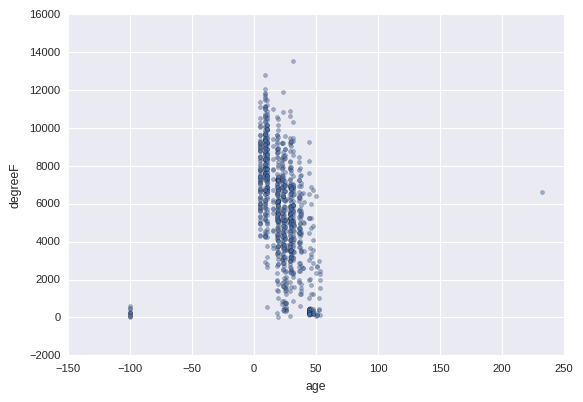

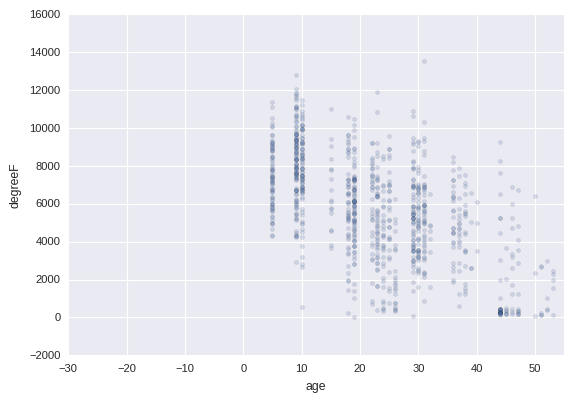

In [324]:
scatterPlot(df, 'age', 'degreeF')

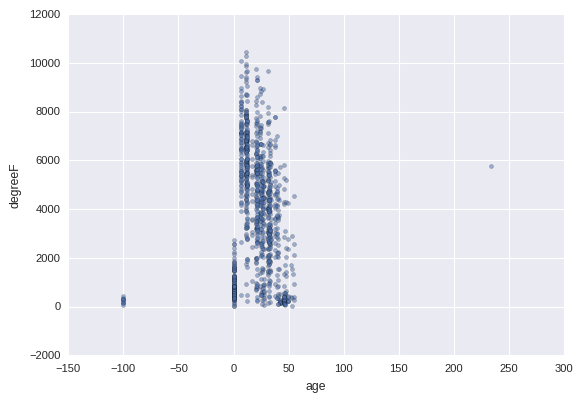

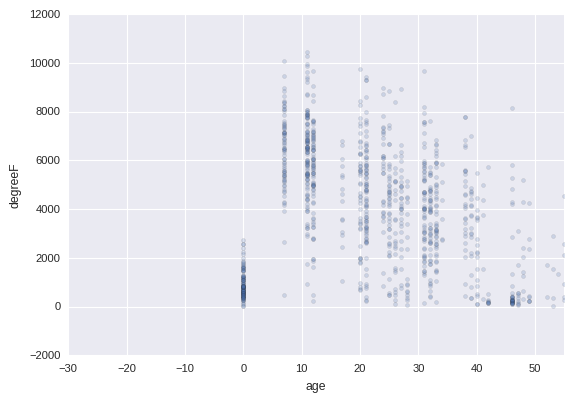

In [329]:
scatterPlot(df, 'age', 'degreeF')

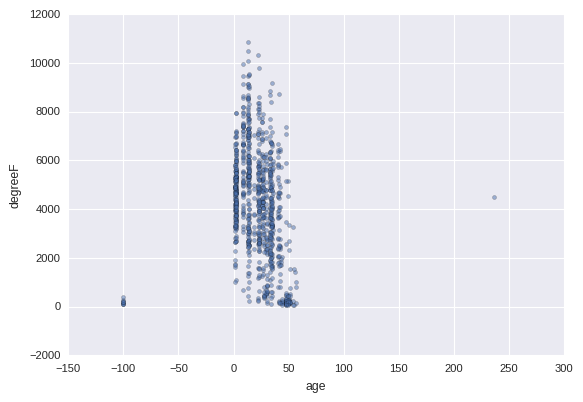

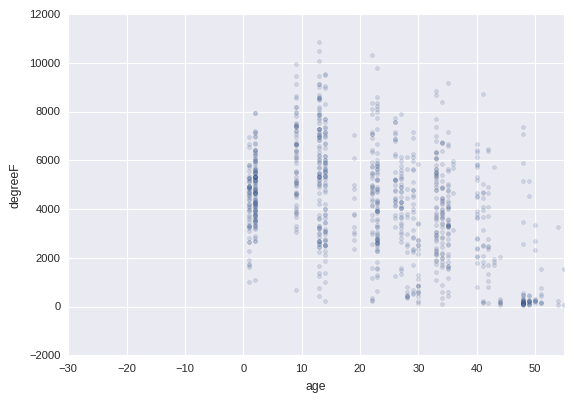

In [333]:
scatterPlot(df, 'age', 'degreeF')